In [42]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

<Axes: >

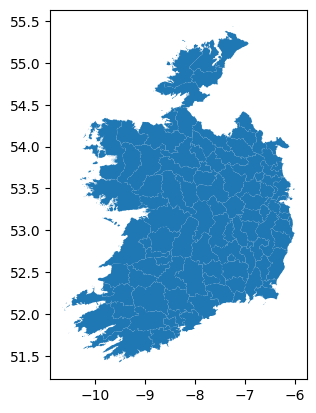

In [2]:
ireland = gpd.read_file("data/geo_data/gadm41_IRL_shp/gadm41_IRL_2.shp")
ireland.plot()

In [3]:
ireland.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IRL.1.1_1,IRL,Ireland,IRL.1_1,Carlow,NA,Carlow,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-6.90837 52.79426, -6.91025 52.79374..."
1,IRL.1.2_1,IRL,Ireland,IRL.1_1,Carlow,NA,Muinebeag,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-6.96537 52.80945, -6.96682 52.80752..."
2,IRL.1.3_1,IRL,Ireland,IRL.1_1,Carlow,NA,Tullow,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-6.90837 52.79426, -6.90999 52.79642..."
3,IRL.2.1_1,IRL,Ireland,IRL.2_1,Cavan,NA,Bailieborough-Cootehill,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-7.31983 54.11353, -7.32103 54.11234..."
4,IRL.2.2_1,IRL,Ireland,IRL.2_1,Cavan,NA,Ballyjamesduff,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-7.27875 53.954, -7.2775 53.95407, -..."


In [4]:
ireland.shape, ireland.NAME_2.nunique()

((106, 14), 106)

In [5]:
ireland_provinces = {
    # Carlow
    'Carlow': 'Leinster',
    'Muinebeag': 'Leinster',
    'Tullow': 'Leinster',

    # Cavan
    'Bailieborough-Cootehill': 'Ulster',
    'Ballyjamesduff': 'Ulster',
    'Cavan-Belturbet': 'Ulster',

    # Clare
    'Ennis': 'Munster',
    'Killaloe': 'Munster',
    'Shannon': 'Munster',
    'West Clare': 'Munster',

    # Cork
    'Bandon - Kinsale': 'Munster',
    'Carrigaline': 'Munster',
    'Cobh': 'Munster',
    'East Cork': 'Munster',
    'Fermoy': 'Munster',
    'Kanturk - Mallow': 'Munster',
    'Macroom': 'Munster',
    'West Cork': 'Munster',
    'Cork City': 'Munster',

    # Donegal
    'Donegal': 'Ulster',
    'Glenties': 'Ulster',
    'Inishowen': 'Ulster',
    'Letterkenny - Milford': 'Ulster',
    'Lifford - Stranorlar': 'Ulster',

    # Dublin
    'Dublin City': 'Leinster',
    'Dún Laoghaire-Rathdown': 'Leinster',
    'Fingal': 'Leinster',
    'South Dublin': 'Leinster',

    # Galway
    'Athenry': 'Connacht',
    'Ballinasloe': 'Connacht',
    'Conamara': 'Connacht',
    'Galway City': 'Connacht',
    'Loughrea': 'Connacht',
    'Tuam': 'Connacht',

    # Kerry
    'Castleisland-Corca Dhuibhne': 'Munster',
    'Kenmare': 'Munster',
    'Killarney': 'Munster',
    'Listowel': 'Munster',
    'Tralee': 'Munster',

    # Kildare
    'Athy': 'Leinster',
    'Celbridge-Leixlip': 'Leinster',
    'Clane-Maynooth': 'Leinster',
    'Kildare-Newbridge': 'Leinster',
    'Naas': 'Leinster',

    # Kilkenny
    'Callan-Thomastown': 'Leinster',
    'Castlecomer': 'Leinster',
    'Kilkenny City': 'Leinster',
    'Piltown': 'Leinster',

    # Laois
    'Borris-in-Ossory-Mountmellick': 'Leinster',
    'Graiguecullen-Portarlington': 'Leinster',
    'Portlaoise': 'Leinster',

    # Leitrim
    'Ballinamore': 'Connacht',
    'Carrick-on-Shannon': 'Connacht',
    'Manorhamilton': 'Connacht',

    # Limerick
    'Adare-Rathkeale': 'Munster',
    'Cappamore-Kilmallock': 'Munster',
    'Limerick City': 'Munster',
    'Newcastle West': 'Munster',

    # Longford
    'Ballymahon': 'Leinster',
    'Granard': 'Leinster',
    'Longford': 'Leinster',

    # Louth
    'Ardee': 'Leinster',
    'Drogheda': 'Leinster',
    'Dundalk': 'Leinster',

    # Mayo
    'Ballina': 'Connacht',
    'Castlebar': 'Connacht',
    'Claremorris - Swinford': 'Connacht',
    'Westport - Belmullet': 'Connacht',

    # Meath
    'Ashbourne': 'Leinster',
    'Kells': 'Leinster',
    'Laytown - Bettystown': 'Leinster',
    'Navan': 'Leinster',
    'Ratoath': 'Leinster',
    'Trim': 'Leinster',

    # Monaghan
    'Ballybay - Clones': 'Ulster',
    'Carrickmacross - Castleblayney': 'Ulster',
    'Monaghan': 'Ulster',

    # Offaly
    'Birr': 'Leinster',
    'Edenderry': 'Leinster',
    'Tullamore': 'Leinster',

    # Roscommon
    'Athlone': 'Connacht',
    'Boyle': 'Connacht',
    'Roscommon': 'Connacht',

    # Sligo
    'Ballymote-Tobercurry': 'Connacht',
    'Sligo': 'Connacht',
    'Sligo-Drumcliff': 'Connacht',

    # Tipperary
    'Carrick-on-Suir': 'Munster',
    'Clonmel': 'Munster',
    'Nenagh': 'Munster',
    'Thurles': 'Munster',
    'Tipperary-Cahir-Cashel': 'Munster',

    # Waterford
    'Comeragh': 'Munster',
    'Dungarvan-Lismore': 'Munster',
    'Waterford City': 'Munster',

    # Westmeath
    'Athlone - Moate': 'Leinster',
    'Mullingar - Kinnegad': 'Leinster',

    # Wexford
    'Enniscorthy': 'Leinster',
    'Gorey-Kilmuckridge': 'Leinster',
    'New Ross': 'Leinster',
    'Rosslare': 'Leinster',
    'Wexford': 'Leinster',

    # Wicklow
    'Arklow': 'Leinster',
    'Baltinglass': 'Leinster',
    'Bray': 'Leinster',
    'Greystones': 'Leinster',
    'Wicklow': 'Leinster'
}


In [8]:
ireland["province"] = ireland.NAME_2.map(ireland_provinces)

In [10]:
ireland.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,province
0,IRL.1.1_1,IRL,Ireland,IRL.1_1,Carlow,NA,Carlow,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-6.90837 52.79426, -6.91025 52.79374...",Leinster
1,IRL.1.2_1,IRL,Ireland,IRL.1_1,Carlow,NA,Muinebeag,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-6.96537 52.80945, -6.96682 52.80752...",Leinster
2,IRL.1.3_1,IRL,Ireland,IRL.1_1,Carlow,NA,Tullow,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-6.90837 52.79426, -6.90999 52.79642...",Leinster
3,IRL.2.1_1,IRL,Ireland,IRL.2_1,Cavan,NA,Bailieborough-Cootehill,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-7.31983 54.11353, -7.32103 54.11234...",Ulster
4,IRL.2.2_1,IRL,Ireland,IRL.2_1,Cavan,NA,Ballyjamesduff,NA,NA,Municipal District,Municipal District,NA,NA,"POLYGON ((-7.27875 53.954, -7.2775 53.95407, -...",Ulster


In [13]:
ireland_provinces = ireland.dissolve(by="province", as_index=False)
ireland_provinces

,province,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,Connacht,"MULTIPOLYGON (((-10.21672 53.39583, -10.21491 ...",IRL.7.1_1,IRL,Ireland,IRL.7_1,Galway,NA,Athenry,NA,NA,Municipal District,Municipal District,NA,NA
1,Leinster,"MULTIPOLYGON (((-6.77034 52.26601, -6.76774 52...",IRL.1.1_1,IRL,Ireland,IRL.1_1,Carlow,NA,Carlow,NA,NA,Municipal District,Municipal District,NA,NA
2,Munster,"MULTIPOLYGON (((-10.24834 51.57014, -10.24814 ...",IRL.3.1_1,IRL,Ireland,IRL.3_1,Clare,NA,Ennis,NA,NA,Municipal District,Municipal District,NA,NA
3,Ulster,"MULTIPOLYGON (((-8.54738 54.59908, -8.54655 54...",IRL.2.1_1,IRL,Ireland,IRL.2_1,Cavan,NA,Bailieborough-Cootehill,NA,NA,Municipal District,Municipal District,NA,NA


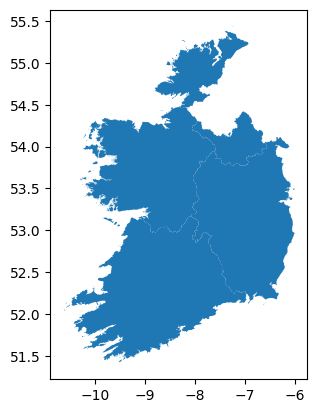

In [24]:
ireland_provinces.plot()
plt.show()

In [53]:
ireland_country = ireland_provinces.dissolve(by="COUNTRY", as_index=False)
ireland_country["province"] = ["Ireland"]
ireland_full = pd.concat([ireland_provinces, ireland_country])

In [54]:
ireland_full

,province,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,Connacht,"MULTIPOLYGON (((-10.21672 53.39583, -10.21491 ...",IRL.7.1_1,IRL,Ireland,IRL.7_1,Galway,NA,Athenry,NA,NA,Municipal District,Municipal District,NA,NA
1,Leinster,"MULTIPOLYGON (((-6.77034 52.26601, -6.76774 52...",IRL.1.1_1,IRL,Ireland,IRL.1_1,Carlow,NA,Carlow,NA,NA,Municipal District,Municipal District,NA,NA
2,Munster,"MULTIPOLYGON (((-10.24834 51.57014, -10.24814 ...",IRL.3.1_1,IRL,Ireland,IRL.3_1,Clare,NA,Ennis,NA,NA,Municipal District,Municipal District,NA,NA
3,Ulster,"MULTIPOLYGON (((-8.54738 54.59908, -8.54655 54...",IRL.2.1_1,IRL,Ireland,IRL.2_1,Cavan,NA,Bailieborough-Cootehill,NA,NA,Municipal District,Municipal District,NA,NA
0,Ireland,"MULTIPOLYGON (((-10.24834 51.57014, -10.24814 ...",IRL.7.1_1,IRL,Ireland,IRL.7_1,Galway,NA,Athenry,NA,NA,Municipal District,Municipal District,NA,NA


In [57]:
ireland_full["geometry"] = ireland_full.centroid

/tmp/ipykernel_31794/3588893318.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ireland_full["geometry"] = ireland_full.centroid


In [58]:
ireland_provinces["GRDP"] = np.random.randint(40000, 80000, size=len(ireland_provinces))

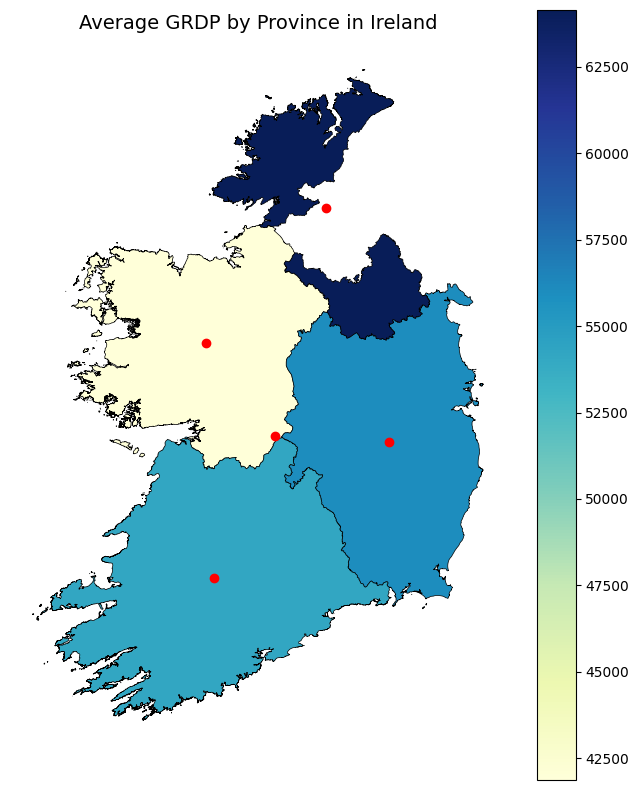

In [61]:
fig, ax = plt.subplots(figsize=(8, 10))

ireland_provinces.plot(
    column="GRDP",
    cmap="YlGnBu",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)
ireland_full.plot(color="red", ax=ax)

plt.title("Average GRDP by Province in Ireland", fontsize=14)
plt.axis("off")
plt.show()